In [1]:
from netCDF4 import Dataset

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import datetime 
#import netcdf4 as nc
import matplotlib.pyplot as plt

In [2]:
import glob
files = glob.glob('/mnt/blaustein/data1/fesd1/seviour/ERA-Interim/MSLP/*197*.nc')

In [3]:
ds = xr.open_mfdataset(files)

OSError: no files to open

In [4]:
ls /mnt/blaustein/data1/fesd1/seviour/ERA-Interim/MSLP

ls: cannot access /mnt/blaustein/data1/fesd1/seviour/ERA-Interim/MSLP: No such file or directory


In [60]:
ds

<xarray.Dataset>
Dimensions:           (bound: 2, latitude: 256, longitude: 512, surface: 1, time: 365)
Coordinates:
  * time              (time) datetime64[ns] 1979-01-01T12:00:00 ...
  * surface           (surface) float32 0.0
  * latitude          (latitude) float32 89.4629 88.7669 88.067 87.366 ...
  * longitude         (longitude) float32 0.0 0.703125 1.40625 2.10938 ...
Dimensions without coordinates: bound
Data variables:
    bounds_latitude   (latitude, bound) float64 89.81 89.11 89.11 88.42 ...
    bounds_longitude  (longitude, bound) float64 -0.3516 0.3516 0.3516 1.055 ...
    mslp              (time, surface, latitude, longitude) float64 1.023e+05 ...

In [8]:
Dago = pd.read_csv('Dagoretti_UHI_1967-2015.csv')#, parse_dates = [[0,1,2]], set_index('YEAR_MONTH_DATE')
df = Dago[['MAX', 'MIN', 'MEAN']].set_index(pd.date_range('19670101', periods=17988))
Dago_95 = df['MEAN'].groupby(df.index.dayofyear).quantile(.95)#95th percentile of each day of the year
hotdays = df['MEAN'][df['MEAN'] > Dago_95[df['MEAN'].index.dayofyear].values].index

In [64]:
hotdays[80].to_datetime64()

numpy.datetime64('1979-12-14T00:00:00.000000000')

In [17]:
ds['time']

<xarray.DataArray 'time' (time: 11688)>
array(['1979-01-01T12:00:00.000000000', '1979-01-02T12:00:00.000000000',
       '1979-01-03T12:00:00.000000000', ..., '2010-12-29T12:00:00.000000000',
       '2010-12-30T12:00:00.000000000', '2010-12-31T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 1979-01-02T12:00:00 ...
Attributes:
    standard_name: time
    axis: T

In [65]:
ds.isel(surface =0, latitude = 0, longitude = 0, time = 0)

<xarray.Dataset>
Dimensions:           (bound: 2)
Coordinates:
    time              datetime64[ns] 1979-01-01T12:00:00
    surface           float32 0.0
    latitude          float32 89.4629
    longitude         float32 0.0
Dimensions without coordinates: bound
Data variables:
    bounds_latitude   (bound) float64 89.81 89.11
    bounds_longitude  (bound) float64 -0.3516 0.3516
    mslp              float64 1.023e+05

In [66]:
testday = hotdays[80].to_datetime64()

In [74]:
ds['mslp'].sel(time='1979-05-01').mean()

<xarray.DataArray 'mslp' ()>
dask.array<mean_ag..., shape=(), dtype=float64, chunksize=()>

In [90]:
hotdays[80].date()

datetime.date(1979, 12, 14)

In [86]:
ds['mslp'].sel(time= '1979-12-14').mean()

<xarray.DataArray 'mslp' ()>
dask.array<mean_ag..., shape=(), dtype=float64, chunksize=()>

In [93]:
ds['time'][0]

<xarray.DataArray 'time' ()>
array(284040000000000000, dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1979-01-01T12:00:00
Attributes:
    standard_name: time
    axis: T

In [116]:
ds.sel(time=slice(hotdays)#, hotdays[82].date()))#, hotdays[81].date()))

SyntaxError: unexpected EOF while parsing (<ipython-input-116-bd3cf20c1c8b>, line 1)

In [108]:
import datetime
datetime.date(hotdays[80:82])

TypeError: an integer is required (got type DatetimeIndex)

In [112]:
hotdays[1]
ds['time'].sel(time=slice('hotdays'),latitude=0.0,longitude=89.4629)

ValueError: dimensions or multi-index levels ['latitude', 'longitude'] do not exist

In [106]:
ds.loc[{'time': hotdays[80:82].date()}]

TypeError: 'numpy.ndarray' object is not callable

In [23]:
pd.date_range(hotdays[150], periods =4)

DatetimeIndex(['1983-07-26', '1983-07-27', '1983-07-28', '1983-07-29'], dtype='datetime64[ns]', freq='D')

In [30]:
ds.iloc[0,0,0,'2010-01-01']

AttributeError: 'Dataset' object has no attribute 'iloc'

In [31]:
df.shape

(4617, 7)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

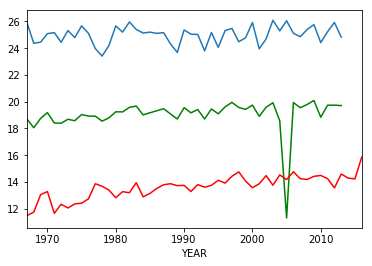

In [41]:
Dago = pd.read_csv('Dagoretti_UHI_1967-2015.csv')#, parse_dates = [[0,1,2]], set_index('YEAR_MONTH_DATE')
df = Dago[['MAX', 'MIN', 'MEAN']].set_index(pd.date_range('19670101', periods=17988))
df = Dago[(Dago.MONTH == 12)| (Dago.MONTH==1) | (Dago.MONTH==1) | (Dago.MONTH ==3)]
#ddd = index=pd.date_range('19670101', periods=17988)
#pd.date_range('1967-01-01', periods = 17988 ).shape
#DJFM_95 = df['MEAN'].groupby(df.index.values.quantile(.95)#95th percentile of each day of the season
#list(range(1, DJFM_min.size))
pcntl = df['MEAN'].quantile(.95)
#pcnt95 = np.repeat(pcntl, DJFM_avg.size)
#final = pcnt95.set_index(list(range(1, DJFM_min.size)))
DJFM_min = df['MIN'].groupby(df['YEAR']).mean() # the 95 percentile of the whole dataset
DJFM_max = df['MAX'].groupby(df['YEAR']).mean() # the mean of the whole dataset
DJFM_max.plot()
A = DJFM_avg.plot(secondary_y=False, style='g')
B = DJFM_min.plot(secondary_y=False, style='r')
C = pcnt95.plot(secondary_y=False, style='b')
A.set_ylabel('CD scale')

In [58]:
pcntl = df['MEAN'].quantile(.95)
#pcnt_val.plot(secondary_y=False, style='b')
pp = np.repeat(pcntl, DJFM_avg.size)
#pandas.Index.repeat(1,5)
#pcntl
pp.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [29]:
df['MEAN'].quantile(.95)

21.4

In [59]:
Series.append()
final = pcnt95.set_index(list(range(1, DJFM_min.size)))

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

In [79]:
#s3 = pd.Series([4], freq=5)
Q = pd.Series([pp], index=[DJFM_min.size])
Q

50    [21.4, 21.4, 21.4, 21.4, 21.4, 21.4, 21.4, 21....
dtype: object

In [39]:
index=pd.date_range('19670101', periods=17988)index=pd.date_range('19670101', periods=17988)

In [69]:
pd.date_range('1967-01-01', periods = 17988 ).shape

(17988,)

In [70]:
Dago.shape

(17988, 7)

In [75]:
df = Dago[['MAX', 'MIN', 'MEAN']].set_index(pd.date_range('19670101', periods=17988))

In [76]:
df.head()

,MAX,MIN,MEAN
1967-01-01,26.4,11.8,19.10
1967-01-02,26.0,10.7,18.35
1967-01-03,26.2,8.3,17.25
1967-01-04,26.1,6.4,16.25
1967-01-05,26.4,6.5,16.45


In [76]:
df[df['MAX'] > 25] # select dagoretti data on days when tmax > 25

,MAX,MIN,MEAN
1967-01-01,26.4,11.8,19.10
1967-01-02,26.0,10.7,18.35
1967-01-03,26.2,8.3,17.25
1967-01-04,26.1,6.4,16.25
1967-01-05,26.4,6.5,16.45
1967-01-06,25.7,6.4,16.05
1967-01-07,25.3,4.8,15.05
1967-01-08,25.9,7.0,16.45
1967-01-09,27.0,10.8,18.90
1967-01-10,27.2,8.5,17.85


In [138]:
df[2>= df.index.month or 11< df.index.month]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [110]:
df['MEAN'].groupby(df.index.quarter('Q-NOV')).mean().rolling(window = 1).mean().plot()

TypeError: 'numpy.ndarray' object is not callable

In [112]:
df.index.quarter('Q-NOV')

TypeError: 'numpy.ndarray' object is not callable

In [91]:
df['MEAN'].describe(percentiles=[.95])

count    16953.000000
mean        18.301652
std          3.348072
min        -45.450000
50%         18.600000
95%         20.950000
max        133.150000
Name: MEAN, dtype: float64

In [119]:
Dago_95 = df['MEAN'].groupby(df.index.season).quantile(.95)#95th percentile of each day of the year

AttributeError: 'DatetimeIndex' object has no attribute 'season'

In [85]:
df['Dates'] = pd.date_range('19670101', periods=17988)
df[(df.Dates > 1967-01) & (aonao.NAO < 0)

,MAX,MIN,MEAN,Dates
1967-01-01,26.4,11.8,19.10,1967-01-01
1967-01-02,26.0,10.7,18.35,1967-01-02
1967-01-03,26.2,8.3,17.25,1967-01-03
1967-01-04,26.1,6.4,16.25,1967-01-04
1967-01-05,26.4,6.5,16.45,1967-01-05


In [96]:
Dago_95.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            357, 358, 359, 360, 361, 362, 363, 364, 365, 366],
           dtype='int64', length=366)

In [101]:
climat = df['MEAN'] - Dago_95[df['MEAN'].index.dayofyear].values# climatology computation

1967-01-01   -1.1875
1967-01-02   -2.1750
1967-01-03   -3.0400
1967-01-04   -4.1850
1967-01-05   -3.9500
1967-01-06   -4.3400
1967-01-07   -5.4000
1967-01-08   -4.1550
1967-01-09   -1.5350
1967-01-10   -3.3050
1967-01-11   -0.8000
1967-01-12   -3.0850
1967-01-13   -0.8100
1967-01-14   -3.7100
1967-01-15   -4.7200
1967-01-16   -2.8450
1967-01-17   -3.8125
1967-01-18   -3.0800
1967-01-19   -1.9750
1967-01-20   -1.4000
1967-01-21   -1.7375
1967-01-22   -2.8750
1967-01-23   -0.9750
1967-01-24   -4.2375
1967-01-25   -3.1750
1967-01-26   -3.1250
1967-01-27   -4.3375
1967-01-28   -4.1875
1967-01-29   -2.4125
1967-01-30   -1.9125
               ...  
2016-03-02       NaN
2016-03-03       NaN
2016-03-04       NaN
2016-03-05       NaN
2016-03-06       NaN
2016-03-07       NaN
2016-03-08       NaN
2016-03-09       NaN
2016-03-10       NaN
2016-03-11       NaN
2016-03-12       NaN
2016-03-13       NaN
2016-03-14       NaN
2016-03-15       NaN
2016-03-16       NaN
2016-03-17       NaN
2016-03-18   

In [162]:
df['MEAN'][df['MEAN'] > Dago_95[df['MEAN'].index.dayofyear].values].index # the days which exceed heatwave threshold

DatetimeIndex(['1967-03-26', '1967-05-24', '1967-12-27', '1969-04-28',
               '1969-04-30', '1969-05-02', '1969-09-02', '1969-10-12',
               '1969-10-14', '1969-10-17',
               ...
               '2015-11-02', '2015-11-23', '2015-12-01', '2015-12-04',
               '2015-12-05', '2015-12-06', '2015-12-07', '2015-12-08',
               '2015-12-09', '2015-12-10'],
              dtype='datetime64[ns]', length=1048, freq=None)

In [ ]:
# to make the composites on these days 
# import the dataset, for example olr
# make sure it's indexed by time 
# olr[date=index].mean().plot()

In [106]:
grp_ary

array(['DJF', 'DJF', 'DJF', ..., 'MAM', 'MAM', 'MAM'], dtype=object)

In [109]:
month_to_season_lu

array([None, 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF'], dtype=object)

In [141]:
df[12== df.index.month]

,MAX,MIN,MEAN
1967-12-01,22.8,11.5,17.15
1967-12-02,23.6,13.8,18.70
1967-12-03,22.0,14.0,18.00
1967-12-04,23.8,14.4,19.10
1967-12-05,23.0,14.0,18.50
1967-12-06,22.0,14.3,18.15
1967-12-07,23.3,14.1,18.70
1967-12-08,23.6,12.5,18.05
1967-12-09,23.8,12.5,18.15
1967-12-10,23.5,13.6,18.55


In [11]:
import matplotlib.pyplot as plt
#df['season'] = df.index.quarter

In [12]:
df.index.quarter

NameError: name 'df' is not defined

In [152]:
df[(df.index.month==12) | (df.index.month==1) | (df.index.month==2)]

,MAX,MIN,MEAN
1967-01-01,26.4,11.8,19.10
1967-01-02,26.0,10.7,18.35
1967-01-03,26.2,8.3,17.25
1967-01-04,26.1,6.4,16.25
1967-01-05,26.4,6.5,16.45
1967-01-06,25.7,6.4,16.05
1967-01-07,25.3,4.8,15.05
1967-01-08,25.9,7.0,16.45
1967-01-09,27.0,10.8,18.90
1967-01-10,27.2,8.5,17.85


In [21]:
test = Dataset('ERA_Interim_sst_1979-2012.nc', "r", format="NETCDF4")

In [22]:
test

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    history: 2015-10-07 13:35:06 GMT by grib_to_netcdf-1.13.1: grib_to_netcdf /data/data04/scratch/netcdf-atls16-a562cefde8a29a7288fa0b8b7f9413f7-hdWL4S.target -o /data/data04/scratch/netcdf-atls16-a562cefde8a29a7288fa0b8b7f9413f7-B3lYA2.nc -utime
    dimensions(sizes): longitude(480), latitude(241), time(3069)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 sst(time,latitude,longitude)
    groups: 

In [66]:
obs = xr.open_dataset('sst_ERA-Interim_daily_1979-1980.nc', decode_times=True)

In [70]:
ts_dat = obs['sst'].sel(time=slice('1979-01-01T12:00:00', '1979-12-31T12:00:00'),latitude=0.0,longitude=86.25)


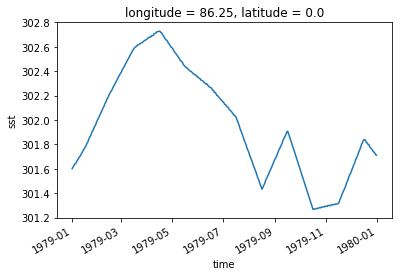

In [71]:
ts_dat.plot()

In [69]:
obs['sst']

<xarray.DataArray 'sst' (time: 731, latitude: 241, longitude: 480)>
[84562080 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * time       (time) datetime64[ns] 1979-01-01T12:00:00 1979-01-02T12:00:00 ...
Attributes:
    units: K
    long_name: Sea surface temperature

In [55]:
ts_dat

<xarray.DataArray 'sst' (time: 13)>
array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])
Coordinates:
    longitude  float32 30.0
    latitude   float32 0.0
  * time       (time) int32 692508 692532 692556 692580 692604 692628 692652 ...
Attributes:
    units: K
    long_name: Sea surface temperature